In [40]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
%matplotlib inline

In [41]:
data = load_boston()
X = pn.DataFrame(data['data'], columns = data['feature_names'])
y = pn.DataFrame(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.preprocessing import StandardScaler


In [43]:
sc = StandardScaler()

In [44]:
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pn.DataFrame(X_train_sc, columns=data['feature_names'])

In [45]:
X_test_sc = sc.transform(X_test)
X_test_sc = pn.DataFrame(X_test_sc, columns=data['feature_names'])

In [46]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [47]:
X_train_tsne = tsne.fit_transform(X_train_sc) 

In [ ]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.title('TSNE')

Task2

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
km = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [203]:
X_km = km.fit_predict(X_train_tsne)

In [205]:
X_km

array([1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [211]:
km.cluster_centers_

array([[-14.244046  , -14.966708  ],
       [ 17.371805  ,  25.432062  ],
       [  0.35576582,  -1.7581235 ]], dtype=float32)

No handles with labels found to put in legend.


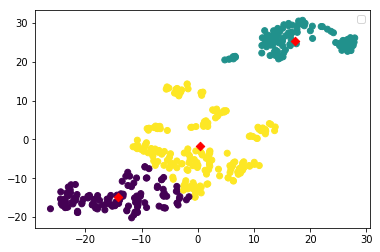

In [212]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=X_km)
plt.scatter(center[:, 0], center[:, 1], marker='D', color='red')
plt.legend()
plt.show()

In [234]:
X_train.loc[X_km == 0, 'CRIM'].mean()

0.08557826086956521

In [232]:
X_train.loc[X_km == 1, 'CRIM'].mean()

13.17982178217822

In [233]:
X_train.loc[X_km == 2, 'CRIM'].mean()

0.6227811170212766

In [238]:
y_train.loc[X_km == 0].mean()

0    25.993043
dtype: float64

In [241]:
y_train.loc[X_km == 1].mean()

0    16.277228
dtype: float64

In [240]:
y_train.loc[X_km == 2].mean()

0    24.343617
dtype: float64

Task3*

In [243]:
Xt_km = km.fit_predict(X_test)

In [244]:
Xt_km

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0], dtype=int32)

In [246]:
X_test.loc[Xt_km == 0, 'CRIM'].mean()

0.2464211594202899

In [247]:
X_test.loc[Xt_km == 1, 'CRIM'].mean()

8.469301923076923

In [248]:
X_test.loc[Xt_km == 2, 'CRIM'].mean()

19.021665714285714

In [249]:
y_test.loc[Xt_km == 0].mean()

0    23.911594
dtype: float64

In [251]:
y_test.loc[Xt_km == 1].mean()

0    17.392308
dtype: float64

In [252]:
y_test.loc[Xt_km == 2].mean()

0    12.814286
dtype: float64